In [6]:
import torch
import numpy as np
from matplotlib import pyplot as plt
from torchvision import transforms, datasets
import main
%matplotlib inline

In [7]:
def visualize_embeddings(embeddings, labels):
    # Plot the embeddings
    plt.scatter(embeddings[:, 0], embeddings[:, 1], c=labels, cmap="tab10")
    plt.colorbar()
    plt.title("Learned Embeddings")
    plt.show()



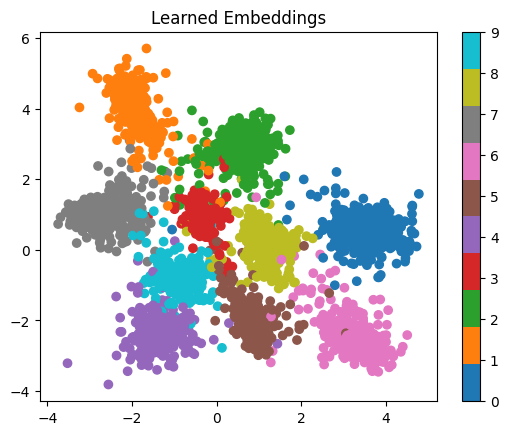

In [8]:
embedding_dims = 2

# Load the trained model and its state dictionary
model = main.Network(embedding_dims)
checkpoint = torch.load("trained_model.pth")
model.load_state_dict(checkpoint["model_state_dict"])

# Prepare the MNIST test dataset for generating embeddings
transform = transforms.ToTensor()
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

# Generate embeddings using the trained model
model.eval()
embeddings = []
labels = []
with torch.no_grad():
    for images, target in test_loader:
        output = model(images)
        embeddings.append(output.numpy())
        labels.append(target.numpy())
embeddings = np.concatenate(embeddings)
labels = np.concatenate(labels)

visualize_embeddings(embeddings, labels)